# Análise de Satisfação de Bancos
Você  foi contratado por uma instituição financeira de grande porte para analisar a satisfação dos clientes com os serviços prestados pela empresa. Como analistas de dados, a missão é coletar, processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.

Para começar, voce vai coletar dados de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas. Com esses dados em mãos, podemos criar um banco de dados robusto e padronizado para análise.

Faça as seguintes análises

1. Analisar **NPS** de classificação de cada instituição
2. Calcular a % de elogios do app para cada instituição
3. Calcular a % de reclamações do app para cada instituição
4. Calcular a % de elogios a instituição para cada instituição
5. Calcular a % de reclamação a instituição para cada instituição
6. Plote um gráfico de linhas para entender a tendência das classificações por instituição

# Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")


# Seaborn Theme

In [2]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

# EDA

In [3]:
#Realizando primeiros tratamentos.

def df_transform()->pd.DataFrame:
  df=pd.read_excel("/content/Dados_Satisfacao.xlsx")
  df.columns = df.columns.str.lower()
  df.columns=['instituicao',
            'comentario',
            'data',
            'classificacao',
            'elogio_app',
            'reclamacao_app',
            'elogio_instituicao', 'reclamacao_instituicao',
            'nao_classificavel']
  df["data"]=pd.to_datetime(df["data"])
  df["elogio_app"]=df["elogio_app"].replace({"NAO":"NÃO"})
  df["instituicao"]=df["instituicao"].replace({"Caixa Econômica Federal":"Caixa Economica Federal"})
  cat_cols=df[["elogio_app","reclamacao_app","elogio_instituicao","reclamacao_instituicao",	"nao_classificavel"]].columns


  return df

df=df_transform()





In [4]:
#penalizando as instituicoes que receberam valores abaixo de 3
df["classificacao"] = df["classificacao"].replace({2: -1, 1: -1, 5: 1, 4: 1, 3: 0})



In [5]:
df.head()

,instituicao,comentario,data,classificacao,elogio_app,reclamacao_app,elogio_instituicao,reclamacao_instituicao,nao_classificavel
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO


In [6]:
#shape do nosso dataset
print(f"Temos {df.shape[0]} linhas, e {df.shape[1]} colunas")

Temos 8702 linhas, e 9 colunas


In [7]:
#identicando NA
'''Nao sera removido, pois comentarios nao vao ser usados nesse primeiro momento'''

df.isna().sum()

instituicao               0
comentario                4
data                      0
classificacao             0
elogio_app                0
reclamacao_app            0
elogio_instituicao        0
reclamacao_instituicao    0
nao_classificavel         0
dtype: int64

In [8]:
#caracteristicas do nosso dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   instituicao             8702 non-null   object        
 1   comentario              8698 non-null   object        
 2   data                    8702 non-null   datetime64[ns]
 3   classificacao           8702 non-null   int64         
 4   elogio_app              8702 non-null   object        
 5   reclamacao_app          8702 non-null   object        
 6   elogio_instituicao      8702 non-null   object        
 7   reclamacao_instituicao  8702 non-null   object        
 8   nao_classificavel       8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 612.0+ KB


In [9]:
#linhas duplicadas
'''Manutencao  das linhas duplicadas pela razao das caractericas unicas de cada linha'''
df[df.duplicated()]

,instituicao,comentario,data,classificacao,elogio_app,reclamacao_app,elogio_instituicao,reclamacao_instituicao,nao_classificavel
18,Banco do Brasil,top,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
70,Banco Bradesco,gosto muito,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
73,Banco Bradesco,muito bom,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
78,Banco Bradesco,ótimo,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
82,Banco Bradesco,Maravilhoso,2019-07-21,1,SIM,NÃO,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...
8677,Caixa Economica Federal,Muito bom,2020-08-24,1,SIM,NÃO,NÃO,NÃO,NÃO
8690,Caixa Economica Federal,Muito bom,2020-08-24,1,SIM,NÃO,NÃO,NÃO,NÃO
8693,Caixa Economica Federal,Muito bom,2020-08-24,1,SIM,NÃO,NÃO,NÃO,NÃO
8695,Caixa Economica Federal,Muito bom,2020-08-24,1,SIM,NÃO,NÃO,NÃO,NÃO


In [10]:
#entendendo quantas vezes cada banco a parece no nosso dataset

df["instituicao"].value_counts("mean")*100


Banco Bradesco             20.006895
Nubank                     20.006895
Banco do Brasil            19.995403
Banco Itau                 19.995403
Caixa Economica Federal    19.995403
Name: instituicao, dtype: float64

In [11]:
#espaco temporal da nosso dataset
print(f"Ultima data {df.data.max()},\nPrimeira data {df.data.min()}")

Ultima data 2020-08-24 00:00:00,
Primeira data 2019-07-21 00:00:00


In [12]:
#separando as colunas para trasnformar
cat_cols=df[["elogio_app","reclamacao_app","elogio_instituicao","reclamacao_instituicao",	"nao_classificavel"]].columns

In [13]:
#transformando object para str
for cat in cat_cols:
  df[cat]=df[cat].astype(str)

#instanciando Label Encoder
le=LabelEncoder()

for cat in cat_cols:
  df[cat]=le.fit_transform(df[cat])

# NPS

 Analisar classificação de cada instituição

In [14]:
df_class = (df.groupby("instituicao")
          .agg({"classificacao": lambda x: (x.mean() * 100).round(2)})
          .sort_values("classificacao", ascending=False)
          .reset_index()
          )
df_class.style.background_gradient(cmap="YlGnBu")

,instituicao,classificacao
0,Banco do Brasil,78.160000
1,Banco Bradesco,68.240000
2,Nubank,58.530000
3,Banco Itau,56.950000
4,Caixa Economica Federal,42.410000


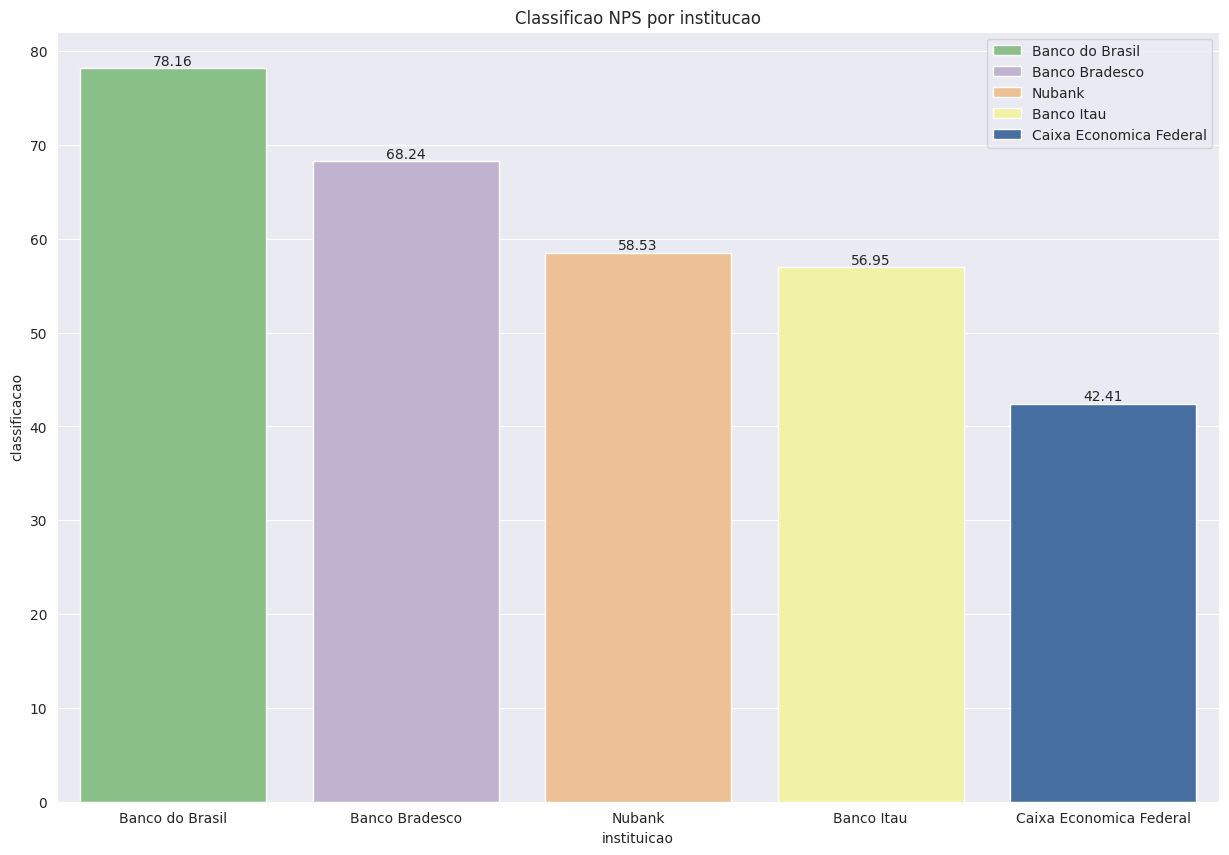

In [15]:
#visualizacao da Classificacao por Bancos
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_class, x="instituicao", y="classificacao", hue="instituicao",dodge=False)
plt.title("Classificao NPS por institucao")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()


* Calcular a % de elogios do app para cada instituição

In [16]:
df_elogios=(df.groupby(["instituicao"])
.agg({"elogio_app": lambda x: (x.mean() * 100).round(2)})
.sort_values("elogio_app", ascending=False)
.reset_index())

df_elogios.style.background_gradient(cmap='YlGnBu')

,instituicao,elogio_app
0,Banco do Brasil,84.250000
1,Banco Bradesco,77.890000
2,Banco Itau,72.820000
3,Caixa Economica Federal,63.510000
4,Nubank,63.010000


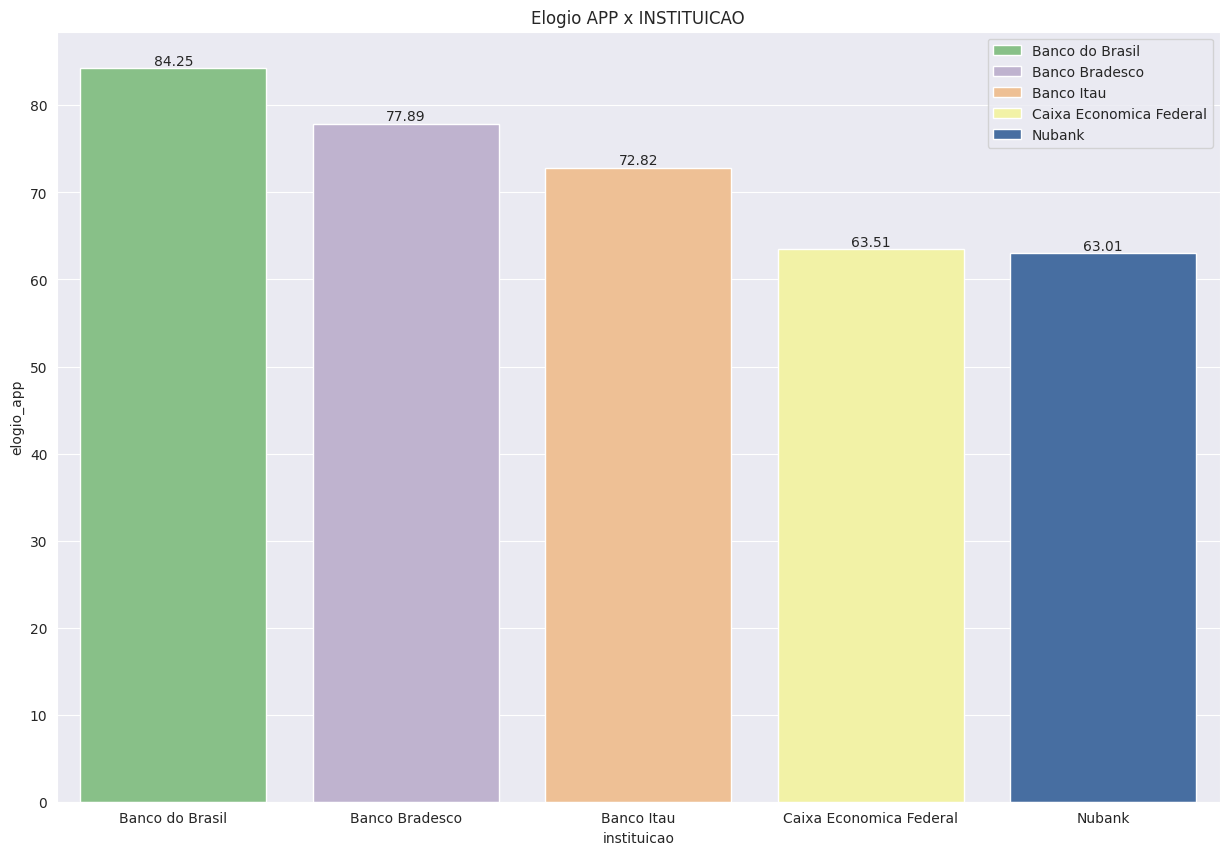

In [17]:
#plotando elogios APP X Instituicao
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_elogios, x="instituicao", y="elogio_app", hue="instituicao",dodge=False)
plt.title("Elogio APP x INSTITUICAO")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()

*  Calcular a % de reclamações do app para cada instituição

In [18]:

df_reclamacao=(df.groupby(["instituicao"])
.agg({"reclamacao_app": lambda x: (x.mean() * 100).round(2)})
.sort_values("reclamacao_app", ascending=False)
.reset_index())

df_reclamacao.style.background_gradient(cmap='YlGnBu')

,instituicao,reclamacao_app
0,Caixa Economica Federal,33.790000
1,Banco Itau,25.400000
2,Banco Bradesco,19.360000
3,Nubank,17.750000
4,Banco do Brasil,13.620000


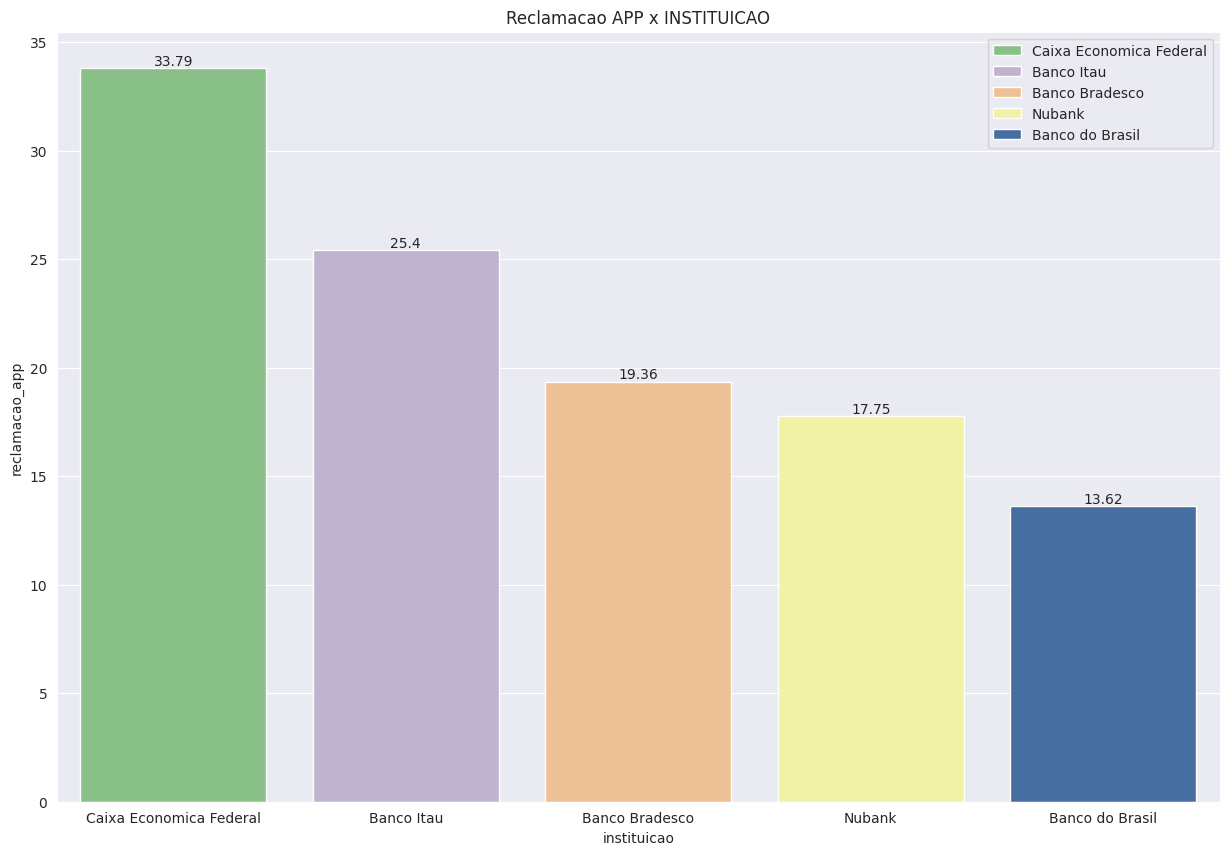

In [19]:
#plotando Reclamacao APP x Instituicao
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_reclamacao, x="instituicao", y="reclamacao_app", hue="instituicao",dodge=False)
plt.title("Reclamacao APP x INSTITUICAO")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()

* Calculando NPS da métrica de Elogio do APP

In [20]:
df_categorias = (df.groupby('instituicao')['elogio_app'].value_counts(normalize=True)
                  .unstack(fill_value=0))
df_categorias['percent'] = df_categorias[1] * 100
df_categorias.sort_values(by='percent', ascending=False,inplace=True)
df_categorias.reset_index(inplace=True)
df_categorias.round(2).style.background_gradient(cmap='YlGnBu')

elogio_app,instituicao,0,1,percent
0,Banco do Brasil,0.160000,0.840000,84.250000
1,Banco Bradesco,0.220000,0.780000,77.890000
2,Banco Itau,0.270000,0.730000,72.820000
3,Caixa Economica Federal,0.360000,0.640000,63.510000
4,Nubank,0.370000,0.630000,63.010000


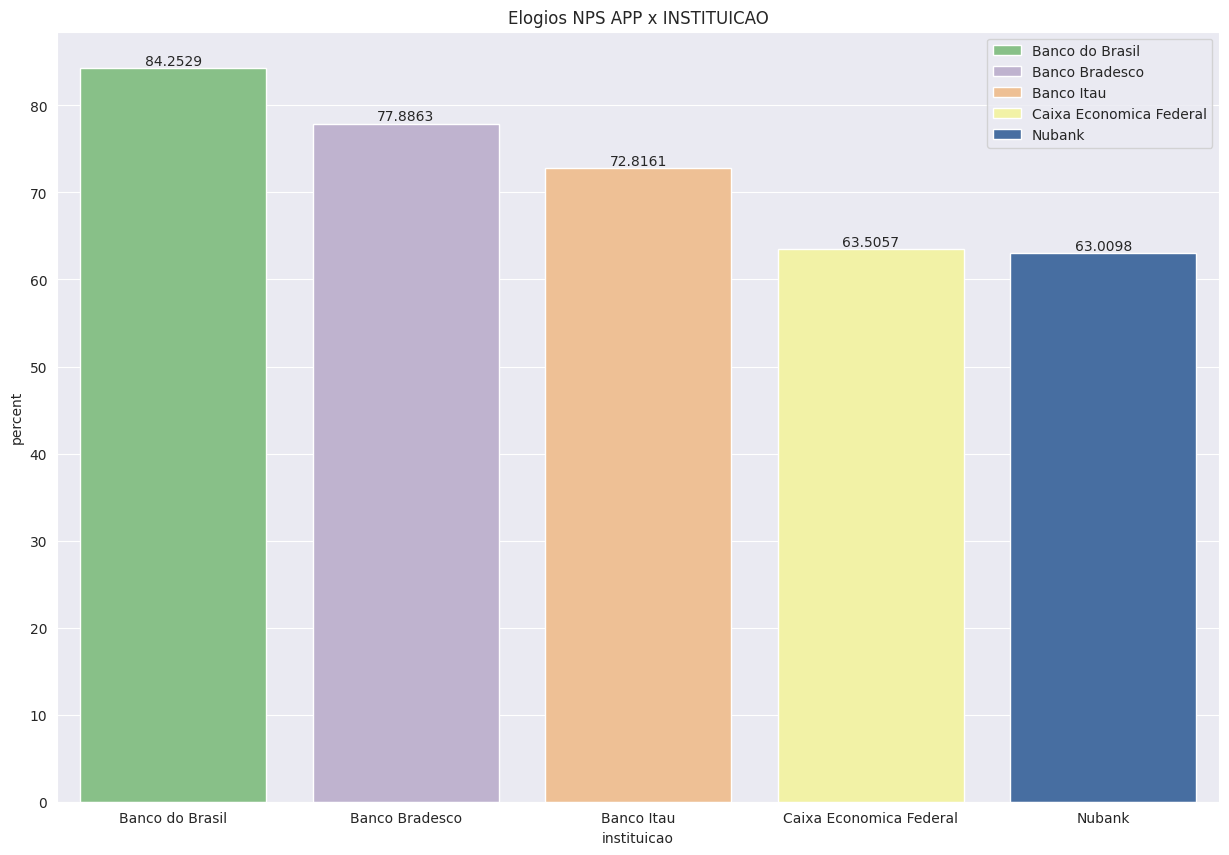

In [21]:
#plotando NPS ELOGIO APP x Instituicao
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_categorias, x="instituicao", y="percent", hue="instituicao",dodge=False)
plt.title("Elogios NPS APP x INSTITUICAO")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()

* Calculando % elogio para a instituicao

In [22]:
df_elogio_inst=(df.groupby(["instituicao"])
.agg({"elogio_instituicao": lambda x: (x.mean() * 100).round(2)})
.sort_values("elogio_instituicao", ascending=False)
.reset_index())
df_elogio_inst.style.background_gradient(cmap="YlGnBu")

,instituicao,elogio_instituicao
0,Nubank,15.510000
1,Banco Itau,2.640000
2,Banco Bradesco,2.070000
3,Banco do Brasil,2.070000
4,Caixa Economica Federal,0.750000


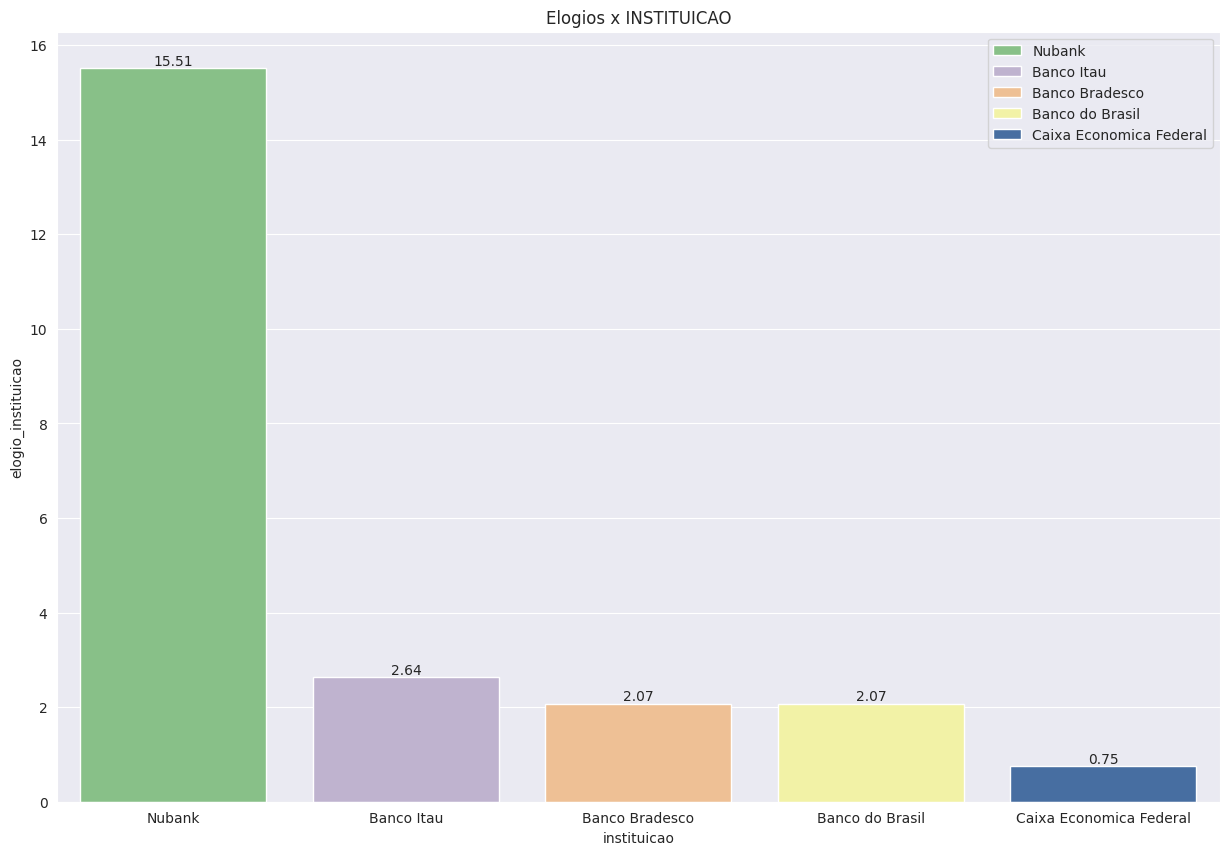

In [23]:
#plotando o elogio por instituicao
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_elogio_inst, x="instituicao", y="elogio_instituicao", hue="instituicao",dodge=False)
plt.title("Elogios x INSTITUICAO")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()

* Calculando % reclamacao para a instituicao

In [24]:
df_recl_inst=(df.groupby(["instituicao"])
.agg({"reclamacao_instituicao": lambda x: (x.mean() * 100).round(2)})
.sort_values("reclamacao_instituicao", ascending=False)
.reset_index())
df_recl_inst.style.background_gradient(cmap="YlGnBu")

,instituicao,reclamacao_instituicao
0,Nubank,14.880000
1,Banco Itau,3.680000
2,Banco do Brasil,2.470000
3,Banco Bradesco,2.350000
4,Caixa Economica Federal,2.130000


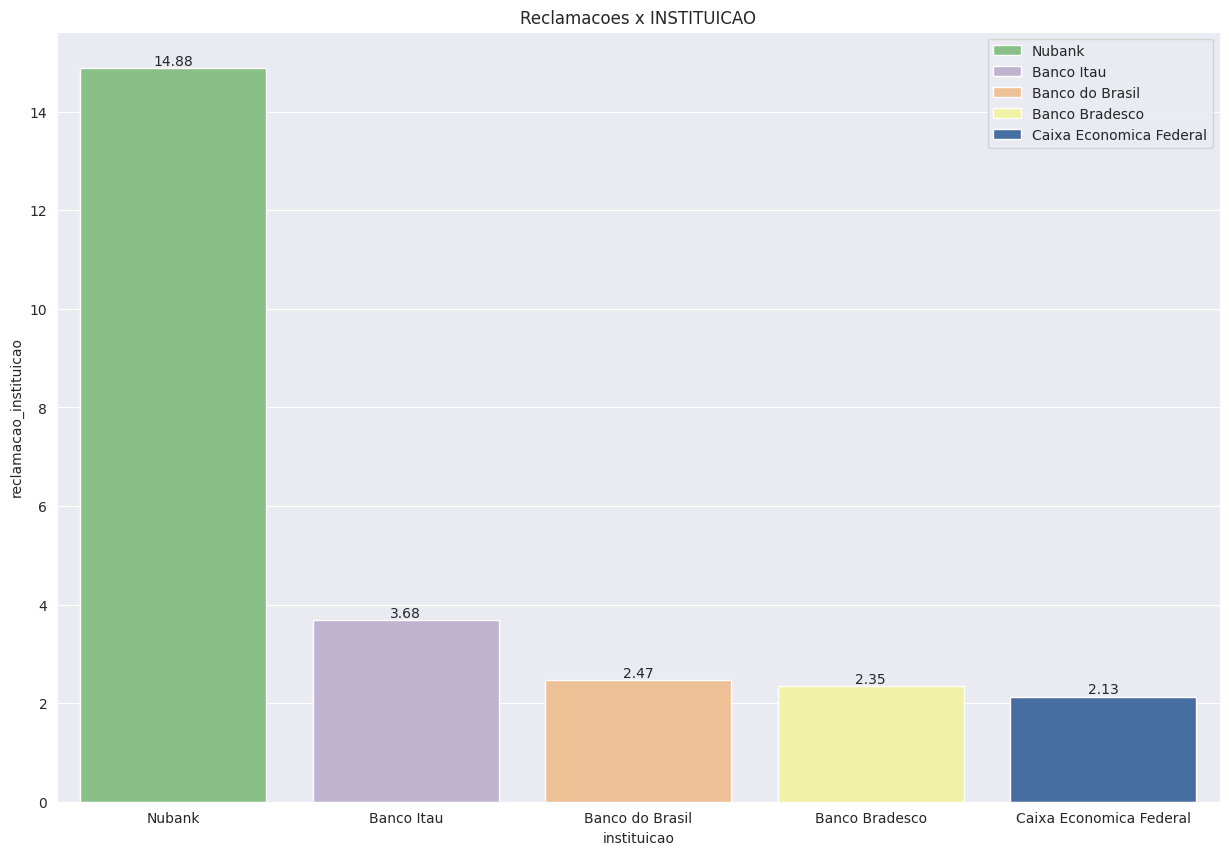

In [25]:
#plotando o reclamacao por instituicao
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df_recl_inst, x="instituicao", y="reclamacao_instituicao", hue="instituicao",dodge=False)
plt.title("Reclamacoes x INSTITUICAO")
for label in ax.containers:
        ax.bar_label(label)
plt.legend(loc='upper right')
plt.show()

#  Gráfico de linhas para entender a tendência das classificações por instituição


* Extraindo e trasnformando cada banco em uma colunas com suas respectivas classificaoes

In [26]:
df["instituicao"].unique()

array(['Banco do Brasil', 'Banco Itau', 'Banco Bradesco', 'Nubank',
       'Caixa Economica Federal'], dtype=object)

In [27]:
df_brasil=df.loc[(df.instituicao)=="Banco do Brasil"]
df_brasil=df_brasil.drop(columns=["comentario","elogio_app","reclamacao_app",
                "elogio_instituicao","reclamacao_instituicao",
                "nao_classificavel", "instituicao"])
df_brasil=df_brasil.set_index("data")
df_brasil=df_brasil.resample("M").mean()
df_brasil.columns=["BB"]



In [28]:
df_itau=df.loc[(df.instituicao)=='Banco Itau']
df_itau=df_itau.drop(columns=["comentario","elogio_app","reclamacao_app",
                "elogio_instituicao","reclamacao_instituicao",
                "nao_classificavel", "instituicao"])
df_itau=df_itau.set_index("data")
df_itau=df_itau.resample("M").mean()
df_itau.columns=["itau"]

In [29]:
df_bradesco=df.loc[(df.instituicao)=='Banco Bradesco']
df_bradesco=df_bradesco.drop(columns=["comentario","elogio_app","reclamacao_app",
                "elogio_instituicao","reclamacao_instituicao",
                "nao_classificavel", "instituicao"])
df_bradesco=df_bradesco.set_index("data")
df_bradesco=df_bradesco.resample("M").mean()
df_bradesco.columns=["bradesco"]

In [30]:
df_nubank=df.loc[(df.instituicao)=='Nubank']
df_nubank=df_nubank.drop(columns=["comentario","elogio_app","reclamacao_app",
                "elogio_instituicao","reclamacao_instituicao",
                "nao_classificavel", "instituicao"])
df_nubank=df_nubank.set_index("data")
df_nubank=df_nubank.resample("M").mean()
df_nubank.columns=["nubank"]

In [31]:
df_cef=df.loc[(df.instituicao)=='Caixa Economica Federal']
df_cef=df_cef.drop(columns=["comentario","elogio_app","reclamacao_app",
                "elogio_instituicao","reclamacao_instituicao",
                "nao_classificavel", "instituicao"])
df_cef=df_cef.set_index("data")
df_cef=df_nubank.resample("M").mean()
df_cef.columns=["cef"]

In [32]:
df_all=pd.concat([df_brasil,df_itau,df_bradesco,df_nubank,df_cef], axis=1)

In [33]:
df_all=df_all.rolling(1).mean()



In [34]:
df_pct=df_all.pct_change().fillna(0)
df_var=(((1 + df_pct).cumprod()-1)*100)

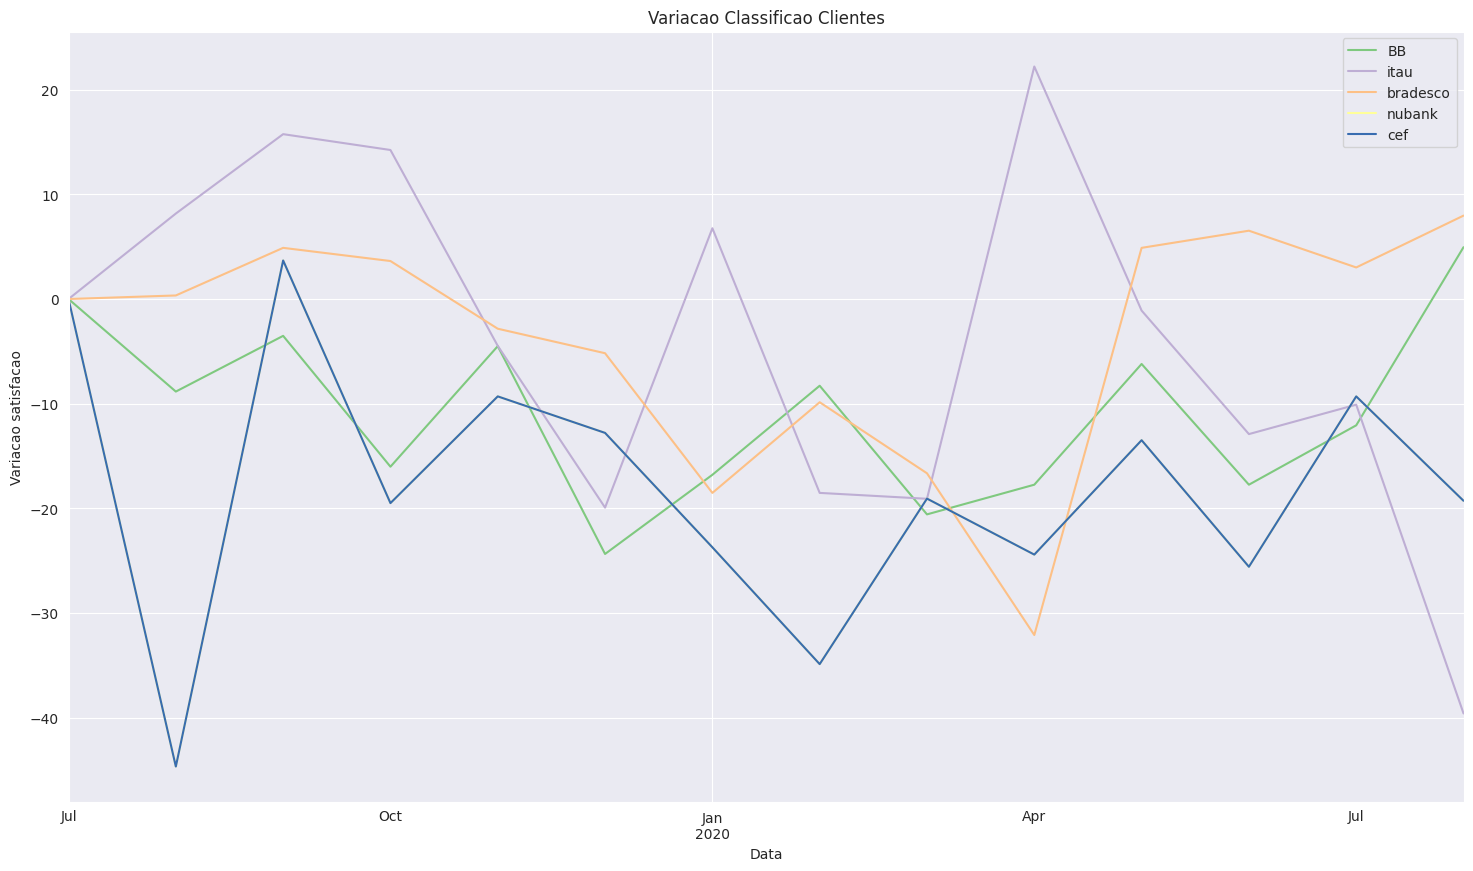

In [35]:
ax=df_var.plot(figsize=(18, 10))
ax.set_ylabel("Variacao satisfacao")
ax.set_xlabel("Data")
ax.set_title("Variacao Classificao Clientes")
plt.show()